In [1]:
import pandas as pd

In [2]:
import sys 
!{sys.executable} -m pip install --upgrade bottleneck

In [3]:
import pandas as pd
print(pd.__version__)

2.3.3


In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
#Data Collection
#Load the dataset
data=pd.read_csv(r'C:\Users\rozin\Downloads\world_population.csv')

In [8]:
#Display basic info about the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [9]:
data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [10]:
#data cleaning

In [11]:
data.shape

(234, 17)

In [12]:
data.isna().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [13]:
print(f"Amount of duplicates:{data.duplicated().sum()}")

Amount of duplicates:0


In [14]:
data.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [15]:
#Data Preprocessing
#Handle missing values
data=data.dropna()

# Exploratory Data Analysis(EDA)

In [16]:
#top 10 countries 2022
top10=data.sort_values("2022 Population",ascending=False).head(10)
print(top10[["Country/Territory","2022 Population"]])

    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862
149           Nigeria        218541212
27             Brazil        215313498
16         Bangladesh        171186372
171            Russia        144713314
131            Mexico        127504125


In [17]:
#Top 10 Countries by Population(2022)
#Bar chart 2022 Population
top10=data.sort_values("2022 Population",ascending=False).head(10)

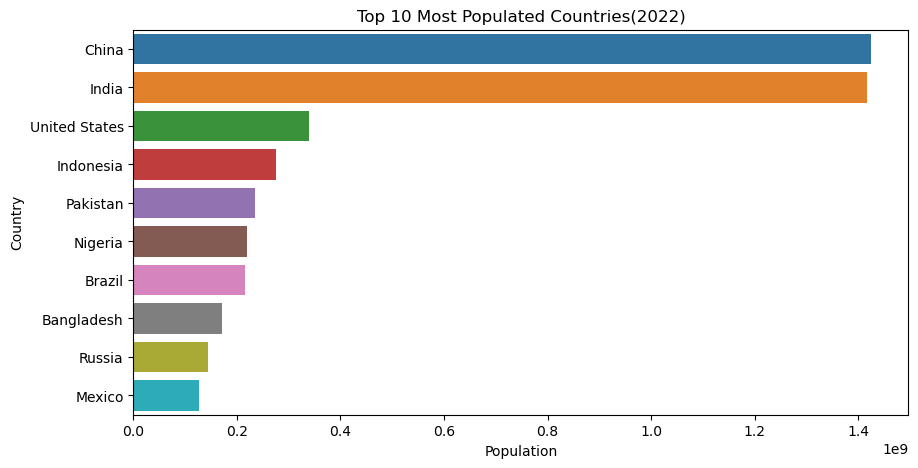

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(
  x="2022 Population",
  y="Country/Territory",
  data=top10
)
plt.title("Top 10 Most Populated Countries(2022)")
plt.xlabel("Population")
plt.ylabel("Country")
plt.show()

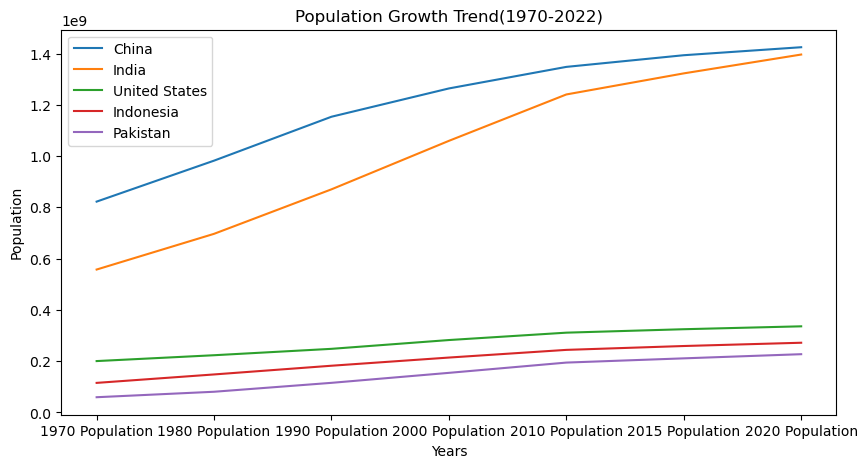

In [20]:
#Population Growth Trend(1970-2022)
#Line chart(top 5 countries)
top5=data.sort_values("2022 Population",ascending=False).head(5)
years=["1970 Population",
"1980 Population",
"1990 Population",
"2000 Population",
"2010 Population",
"2015 Population",
"2020 Population"]
plt.figure(figsize=(10,5))
for i in range(len(top5)):
    plt.plot(
        years,
        top5.iloc[i][years],
        label=top5.iloc[i]["Country/Territory"])
    
plt.title("Population Growth Trend(1970-2022)")
plt.xlabel("Years")
plt.ylabel("Population")
plt.legend()
plt.show()

In [7]:
#wold population growth rate
#Fastest & slowest Growing Country

fastest=data.sort_values("Growth Rate",ascending=False).head(5)
slowest=data.sort_values("Growth Rate").head(5)

print("Fastest Growing Country:")
print(fastest[["Country/Territory","Growth Rate"]])

print("\nSlowest Growing Country:")
print(slowest[["Country/Territory","Growth Rate"]])

Fastest Growing Country:
    Country/Territory  Growth Rate
133           Moldova       1.0691
164            Poland       1.0404
148             Niger       1.0378
202             Syria       1.0376
189          Slovakia       1.0359

Slowest Growing Country:
    Country/Territory  Growth Rate
218           Ukraine       0.9120
112           Lebanon       0.9816
3      American Samoa       0.9831
30           Bulgaria       0.9849
117         Lithuania       0.9869


<function matplotlib.pyplot.show(close=None, block=None)>

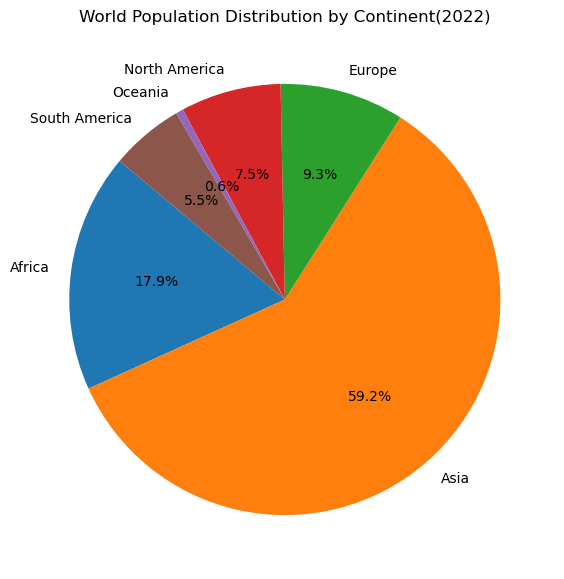

In [21]:
#World Population share by Continenet
#pie chart
continent_pop=data.groupby("Continent")["2022 Population"].sum()

plt.figure(figsize=(7,7))
plt.pie(
   continent_pop,
   labels=continent_pop.index,
   autopct="%1.1f%%",
   startangle=140
)
plt.title("World Population Distribution by Continent(2022)")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

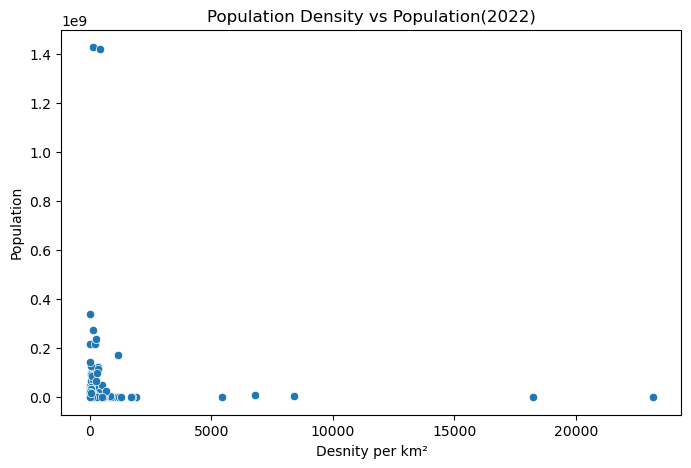

In [22]:
#Population Density vs Population
#scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Density (per km²)",
    y="2022 Population",
    data=data
)
plt.title("Population Density vs Population(2022)")
plt.xlabel("Desnity per km²")
plt.ylabel("Population")
plt.show

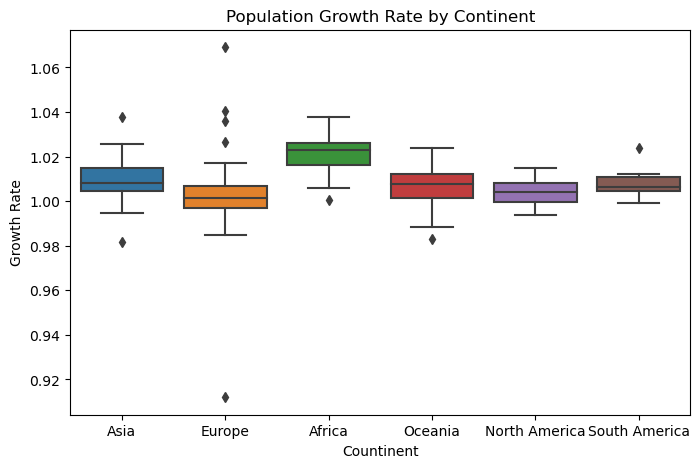

In [23]:
#Growth Rate by Continent
#Box plot
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Continent",
    y="Growth Rate",
    data=data
)
plt.title("Population Growth Rate by Continent")
plt.xlabel("Countinent")
plt.ylabel("Growth Rate")
plt.show()

In [9]:
data["Land_Area_per_person"]=(
   data["Area (km²)"]/data["2022 Population"])

<function matplotlib.pyplot.show(close=None, block=None)>

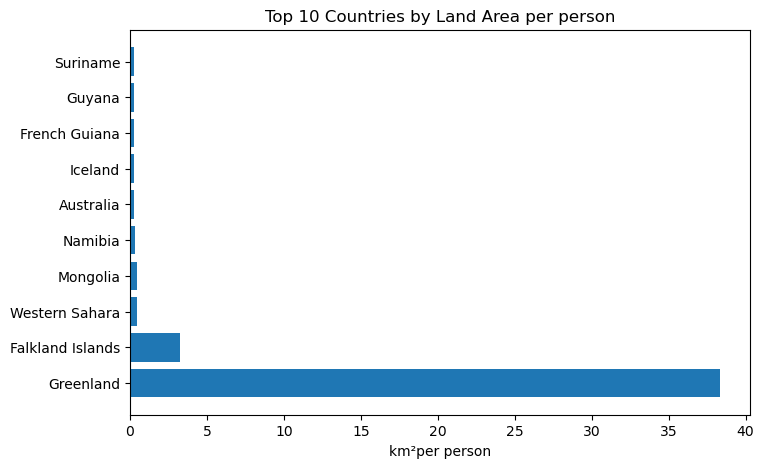

In [11]:
top_land=data.sort_values(
  "Land_Area_per_person",ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top_land["Country/Territory"],top_land["Land_Area_per_person"])

plt.title("Top 10 Countries by Land Area per person")
plt.xlabel("km²per person")
plt.show

# Feature Engineering

In [12]:
data["Growth_2000_2022"]=(
    (data["2022 Population"]-data["2000 Population"])
     /data["2000 Population"]
)*100

# Model Buliding

Features(X)

Target(y)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
features=["1970 Population","1980 Population","1990 Population",
"2000 Population","2010 Population","2015 Population","2020 Population",
"Area (km²)",
"Density (per km²)"]         
X=data[features]
y=data["2022 Population"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)


In [29]:
y_pred

array([3.13155234e+05, 7.13778664e+07, 4.32654600e+04, 2.76386508e+06,
       3.67204634e+05, 6.62123652e+06, 4.77178170e+07, 2.75376906e+08,
       8.52984604e+07, 1.53277226e+06, 3.44370968e+07, 9.88003223e+07,
       2.70028123e+07, 6.80032084e+06, 8.72701094e+06, 6.91823159e+06,
       1.16266153e+07, 5.10256137e+06, 3.35276258e+05, 1.22332391e+07,
       8.83009084e+06, 1.15952216e+05, 4.42783172e+07, 1.74911515e+07,
       6.73561020e+07, 3.21300966e+06, 8.25611676e+05, 1.72861875e+07,
       1.38298275e+07, 9.51942395e+06, 5.26962235e+06, 9.22779861e+05,
       5.18483255e+06, 3.30476397e+07, 5.48411413e+05, 1.91117450e+07,
       3.80704966e+07, 1.70244458e+08, 2.32477620e+08, 1.51138605e+04,
       6.76124010e+06, 2.37864207e+07, 2.25625398e+07, 3.64493448e+06,
       6.24428815e+05, 2.05811511e+04, 1.78409308e+07])

In [30]:
y_test

69        304557
206     71697030
180        33660
9        2780469
127       367507
109      6630623
196     47558630
93     275501339
213     85341241
15       1472233
224     34627652
55      99010212
227     28301696
30       6781953
201      8740472
147      6948392
19      11655930
112      5489739
225       326740
24      12224110
208      8848699
10        106445
95      44496122
144     17564014
220     67508936
25       3233526
86        808726
183     17316449
84      13859341
18       9534954
146      5185288
66        929766
45       5180829
139     32969517
125       533286
170     19659267
164     39857145
16     171186372
156    235824862
177         5862
161      6780744
203     23893394
124     22593590
60       3684032
199       618040
229        11572
82      17843908
Name: 2022 Population, dtype: int64

In [15]:
y_pred_int=y_pred.astype(int)

In [16]:
y_pred_int

array([   313155,  71377866,     43265,   2763865,    367204,   6621236,
        47717816, 275376906,  85298460,   1532772,  34437096,  98800322,
        27002812,   6800320,   8727010,   6918231,  11626615,   5102561,
          335276,  12233239,   8830090,    115952,  44278317,  17491151,
        67356102,   3213009,    825611,  17286187,  13829827,   9519423,
         5269622,    922779,   5184832,  33047639,    548411,  19111744,
        38070496, 170244457, 232477620,     15113,   6761240,  23786420,
        22562539,   3644934,    624428,     20581,  17840930])

In [9]:
from sklearn.metrics import mean_squared_error,r2_score

print("MSE",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

MSE 377850400496.35815
R2 Score: 0.9998843822916005


In [10]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(max_depth=5,random_state=42)
dt_model.fit(X_train,y_train)

dt_pred=dt_model.predict(X_test)
dt_r2=r2_score(y_test,dt_pred)

print("Decission Tree R2 Score:",dt_r2)

Decission Tree R2 Score: 0.9455568620588345


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_model=RandomForestRegressor(
  n_estimators=100,random_state=42)

rf_model.fit(X_train,y_train)

rf_pred=rf_model.predict(X_test)
rf_r2=r2_score(y_test,rf_pred)

print("Random Forest R2 Score:",rf_r2)

Random Forest R2 Score: 0.9616461227155356


In [13]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svr_model=Pipeline([
    ("Scaler",StandardScaler()),
    ("svr",SVR(kernel="rbf"))
])
 
svr_model.fit(X_train,y_train)

svr_pred=svr_model.predict(X_test)
svr_r2=r2_score(y_test,svr_pred)

print("Support Vector Regressor:",svr_r2)

Support Vector Regressor: -0.21755554846450997


In [38]:
X_test_reset=X_test.reset_index(drop=True)
y_test_reset=y_test.reset_index(drop=True)

y_pred_series=pd.Series(y_pred,name="y_pred")
data1=pd.concat([X_test_reset,y_test_reset.rename("y_test"),y_pred_series],axis=1)

data1["y_pred"]=data1["y_pred"].round(0).astype(int)

data1.head()

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,Area (km²),Density (per km²),y_test,y_pred
0,46484,66825,113931,164351,228453,257026,290969,83534,3.6459,304557,313155
1,35791728,45737753,55228410,63066603,68270489,70294397,71475664,513120,139.7276,71697030,71377866
2,18169,21346,23132,26823,31608,33570,34007,61,551.8033,33660,43265
3,2534377,3135123,3556539,3168523,2946293,2878595,2805608,29743,93.4831,2780469,2763865
4,326428,333786,374271,432543,392181,383515,370391,1128,325.8041,367507,367205


In [ ]:
#Actual vs Prediction Population

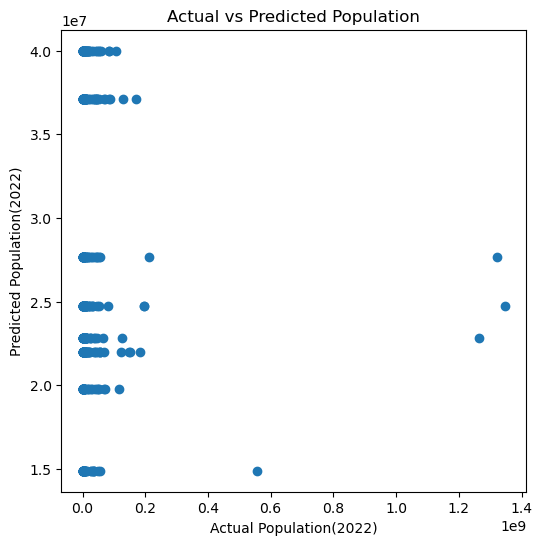

In [38]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

plt.title("Actual vs Predicted Population")
plt.xlabel("Actual Population(2022)")
plt.ylabel("Predicted Population(2022)")
plt.show()

## Conclusion

In [ ]:
The analysis revealed consistent global population growth from 1970 to 2022.
Visualizations helped identify key population trends across countries.
The machine learning model successfully learned historical patterns and produced reliable predictions.
This project highlights the practical application of data analytics and machine learning in population studies.